# Bilbliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot
import numpy

# Importa o arquivo csv

In [3]:
#Com o Pandas é possível importar qualquer tipo de arquivo CSV, incluse on-line. A função sep informa o formato dos dados, já o header=0 atribui a primeira como o nome das colunas.
arquivo = 'TesesDissertacoes_tortura.csv'
suc = pd.read_csv(arquivo, sep=',', header=0)

# Salvar o csv

In [ ]:
#Salvar com separação ';' em csv e utf-8
suc.to_csv('ScrapeSucupira_resumosX.csv', sep=';', encoding='utf-8')

# Verificando características do banco

In [7]:
suc.head(3)

,Unnamed: 0,id,instituicao,Programa,mun,titulo,autor,Defesa,biblioteca,grauAcademico,link
0,0,20058032006012012P0,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,HISTÓRIA,UBERLÂNDIA,Práticas de tortura narradas em Torquemada (19...,Sandra Alves Fiuza,2005-10-01,UFU - Santa Mônica,Mestrado,NaN
1,1,20096033005010010P8,PONTIFÍCIA UNIVERSIDADE CATÓLICA DE SÃO PAULO,HISTÓRIA,SÃO PAULO,A tortura em questão: a disputa de memórias en...,ELISABETE FERNANDES BASÍLIO TAMAS,2009-12-01,PUC SP,Doutorado,NaN
2,2,20112152001016002P0,UNIVERSIDADE FEDERAL DE GOIÁS,HISTÓRIA,GOIÂNIA,OS SONS DO SILÊNCIO: O LOUCO E A LOUCURA EM GOIÁS,Éder Mendes de Paula,2011-04-01,Biblioteca Central da UFG,Mestrado,NaN


In [5]:
#Declarar a coluna referente a data da "defesa" como date and time. 
#A intenção é posteriormene plotar um gráfico para verificar o comportamento das publicações no tempo.
suc['Defesa'] = pd.to_datetime(suc['Defesa'])

# Analise os dados

Número de trabalhos sobre "tortura" no portal da Capes

In [9]:
len(suc.grauAcademico)

2359

Entre os trabalhos coletados, como é a distribuição por ano da defesa?

In [6]:
defesa = suc.Defesa.dt.year.value_counts()
defesa

2016    239
2018    234
2017    208
2015    203
2014    164
2013    148
2011    125
2012    124
2009    109
2010    106
2007    105
2008    102
2006     83
2004     63
2005     63
2002     56
2003     49
2001     42
2000     33
1999     21
1998     20
1997     17
1996     13
1993      8
1995      8
1994      5
1991      4
1992      3
1987      2
1989      1
1986      1
Name: Defesa, dtype: int64

Quantos trabalhos sobre tortura foram escritos por tipo?

In [11]:
suc.grauAcademico.value_counts()

Mestrado                 1782
Doutorado                 530
Mestrado Profissional      38
Profissionalizante          9
Name: grauAcademico, dtype: int64

Data da defesa e tipo de trabalho

In [8]:
suc.groupby(suc.Defesa.dt.year).grauAcademico.value_counts()

Defesa  grauAcademico        
1986    Doutorado                  1
1987    Doutorado                  1
        Mestrado                   1
1989    Mestrado                   1
1991    Mestrado                   4
1992    Mestrado                   3
1993    Mestrado                   5
        Doutorado                  3
1994    Mestrado                   5
1995    Mestrado                   5
        Doutorado                  3
1996    Mestrado                  10
        Doutorado                  3
1997    Mestrado                  12
        Doutorado                  5
1998    Mestrado                  13
        Doutorado                  7
1999    Mestrado                  18
        Doutorado                  3
2000    Mestrado                  25
        Doutorado                  8
2001    Mestrado                  36
        Doutorado                  6
2002    Mestrado                  48
        Doutorado                  8
2003    Mestrado                  39
        

Timeseries sobre o total de trabalhos sobre tortura no tempo.

Text(0.5, 0, 'Ano')

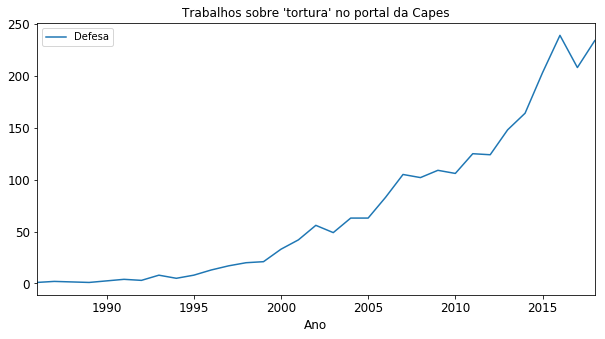

In [50]:
suc.Defesa.dt.year.value_counts().sort_index().plot(title ="Trabalhos sobre 'tortura' no portal da Capes", figsize=(10, 5), legend=True, fontsize=12).set_xlabel("Ano", fontsize=12)

Barras sobre o total de trabalhos sobre tortura no tempo

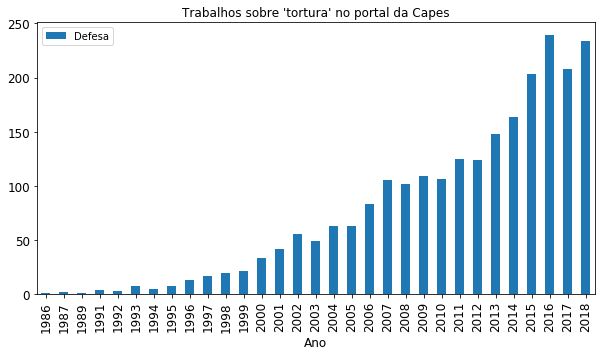

In [98]:
ax = suc.Defesa.dt.year.value_counts().sort_index().plot.bar(title ="Trabalhos sobre 'tortura' no portal da Capes", figsize=(10, 5), legend=True,fontsize=12).set_xlabel("Ano", fontsize=12)
fig = ax.get_figure()
fig.savefig('trabalhos.pdf')

Barras invertidas sobre os tipos de trabalhos sobre tortura

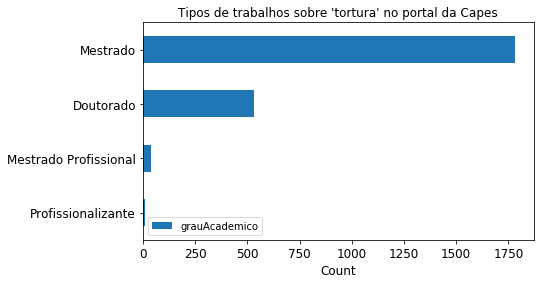

In [102]:
x = suc.grauAcademico.value_counts().sort_values().plot.barh(title ="Tipos de trabalhos sobre 'tortura' no portal da Capes", figsize=(7, 4), legend=True, fontsize=12).set_xlabel("Count", fontsize=12)
x.get_figure().savefig('area.pdf', format='pdf')

In [ ]:
Fim!